In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# ================== LOAD DATA ==================
columns = [
    "Status Rekening", "Durasi(bulan)", "Riwayat Kredit", "Tujuan Kredit", "Jumlah Kredit",
    "Tabungan", "Lama Bekerja", "Rasio Cicilan", "Status Pribadi", "Penanggung Lain",
    "Lama Tinggal", "Kepemilikan Properti", "Usia", "Rencana Cicilan Lain", "Tempat Tinggal",
    "Jumlah Kredit yang Dimiliki", "Pekerjaan", "Jumlah Tanggungan", "Telepon", "Pekerja Asing", "Target"
]

df = pd.read_csv("../data/german.data",
                 delim_whitespace=True,
                 header=None,
                 names=columns)

C:\Users\USER\AppData\Local\Temp\ipykernel_4668\909878552.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/german.data",


In [41]:
print("Jumlah data (N):", df.shape[0])

Jumlah data (N): 1000


In [42]:
print("\nJumlah fitur (D):", df.shape[1] - 1)
print("\nDaftar fitur:", list(df.columns[:-1]))




Jumlah fitur (D): 20

Daftar fitur: ['Status Rekening', 'Durasi(bulan)', 'Riwayat Kredit', 'Tujuan Kredit', 'Jumlah Kredit', 'Tabungan', 'Lama Bekerja', 'Rasio Cicilan', 'Status Pribadi', 'Penanggung Lain', 'Lama Tinggal', 'Kepemilikan Properti', 'Usia', 'Rencana Cicilan Lain', 'Tempat Tinggal', 'Jumlah Kredit yang Dimiliki', 'Pekerjaan', 'Jumlah Tanggungan', 'Telepon', 'Pekerja Asing']


In [43]:

print("\nDistribusi data numerik:")
print(df.describe())


Distribusi data numerik:
       Durasi(bulan)  Jumlah Kredit  Rasio Cicilan  Lama Tinggal         Usia  \
count    1000.000000    1000.000000    1000.000000   1000.000000  1000.000000   
mean       20.903000    3271.258000       2.973000      2.845000    35.546000   
std        12.058814    2822.736876       1.118715      1.103718    11.375469   
min         4.000000     250.000000       1.000000      1.000000    19.000000   
25%        12.000000    1365.500000       2.000000      2.000000    27.000000   
50%        18.000000    2319.500000       3.000000      3.000000    33.000000   
75%        24.000000    3972.250000       4.000000      4.000000    42.000000   
max        72.000000   18424.000000       4.000000      4.000000    75.000000   

       Jumlah Kredit yang Dimiliki  Jumlah Tanggungan       Target  
count                  1000.000000        1000.000000  1000.000000  
mean                      1.407000           1.155000     1.300000  
std                       0.577654   

In [44]:

print("\nTipe data setiap atribut:")
print(df.dtypes)



Tipe data setiap atribut:
Status Rekening                object
Durasi(bulan)                   int64
Riwayat Kredit                 object
Tujuan Kredit                  object
Jumlah Kredit                   int64
Tabungan                       object
Lama Bekerja                   object
Rasio Cicilan                   int64
Status Pribadi                 object
Penanggung Lain                object
Lama Tinggal                    int64
Kepemilikan Properti           object
Usia                            int64
Rencana Cicilan Lain           object
Tempat Tinggal                 object
Jumlah Kredit yang Dimiliki     int64
Pekerjaan                      object
Jumlah Tanggungan               int64
Telepon                        object
Pekerja Asing                  object
Target                          int64
dtype: object


In [45]:

print("\nApakah ada missing values?")
print(df.isnull().sum())


Apakah ada missing values?
Status Rekening                0
Durasi(bulan)                  0
Riwayat Kredit                 0
Tujuan Kredit                  0
Jumlah Kredit                  0
Tabungan                       0
Lama Bekerja                   0
Rasio Cicilan                  0
Status Pribadi                 0
Penanggung Lain                0
Lama Tinggal                   0
Kepemilikan Properti           0
Usia                           0
Rencana Cicilan Lain           0
Tempat Tinggal                 0
Jumlah Kredit yang Dimiliki    0
Pekerjaan                      0
Jumlah Tanggungan              0
Telepon                        0
Pekerja Asing                  0
Target                         0
dtype: int64



Label unik: [1 2]

Distribusi label:
Target
1    700
2    300
Name: count, dtype: int64


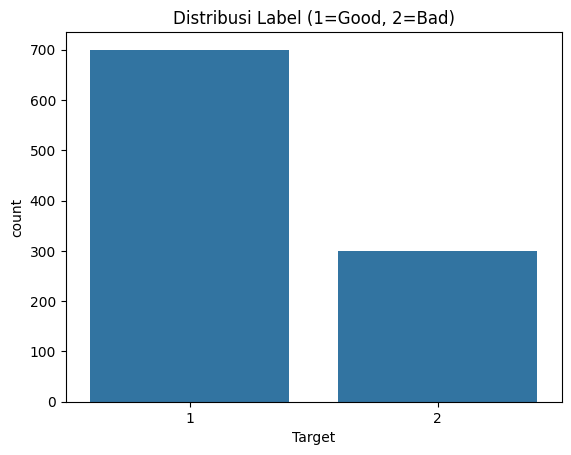

In [46]:
print("\nLabel unik:", df["Target"].unique())
print("\nDistribusi label:")
print(df["Target"].value_counts())


sns.countplot(x="Target", data=df)
plt.title("Distribusi Label (1=Good, 2=Bad)")
plt.show()



Contoh data:
  Status Rekening  Durasi(bulan) Riwayat Kredit Tujuan Kredit  Jumlah Kredit  \
0             A11              6            A34           A43           1169   
1             A12             48            A32           A43           5951   
2             A14             12            A34           A46           2096   
3             A11             42            A32           A42           7882   
4             A11             24            A33           A40           4870   

  Tabungan Lama Bekerja  Rasio Cicilan Status Pribadi Penanggung Lain  ...  \
0      A65          A75              4            A93            A101  ...   
1      A61          A73              2            A92            A101  ...   
2      A61          A74              2            A93            A101  ...   
3      A61          A74              2            A93            A103  ...   
4      A61          A73              3            A93            A101  ...   

   Kepemilikan Properti Usia  Rencan

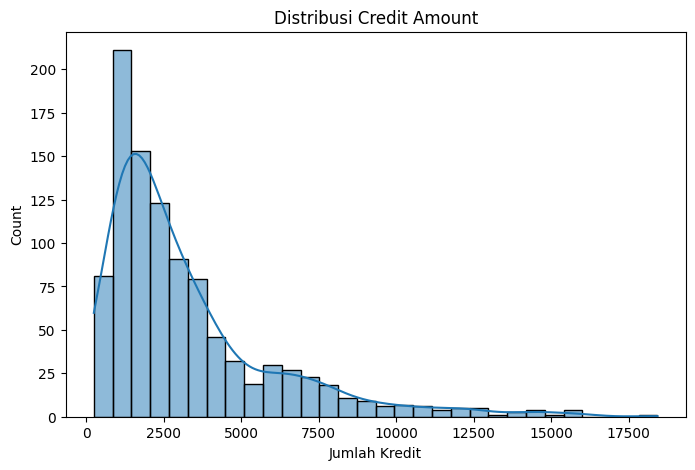

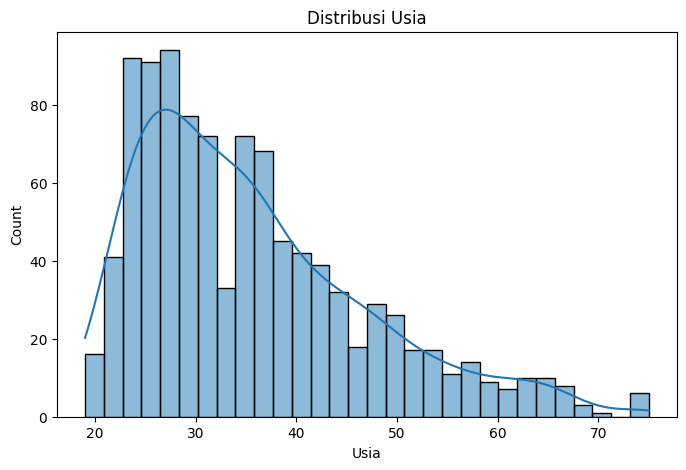

In [47]:
print("\nContoh data:")
print(df.head())

plt.figure(figsize=(8,5))
sns.histplot(df["Jumlah Kredit"], bins=30, kde=True)
plt.title("Distribusi Credit Amount")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Usia"], bins=30, kde=True)
plt.title("Distribusi Usia")
plt.show()

In [48]:
print("\nLearning Setting: Supervised Learning ")


Learning Setting: Supervised Learning 


In [49]:
# Encode kategorikal dulu agar bisa dipakai ML
from sklearn.preprocessing import LabelEncoder

df_enc = df.copy()
for col in df_enc.select_dtypes(include='object').columns:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

X = df_enc.drop("Target", axis=1)
y = df_enc["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nUkuran Train:", X_train.shape)
print("Ukuran Test :", X_test.shape)


Ukuran Train: (800, 20)
Ukuran Test : (200, 20)


In [50]:
le = LabelEncoder()
y = le.fit_transform(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# ---------------------------------------------------------
# IMPORT LIBRARY
# ---------------------------------------------------------
import time
import joblib
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# ---------------------------------------------------------
# TRAINING MODEL (BASELINE)
# ---------------------------------------------------------
print("Training Logistic Regression (Baseline)...")

start = time.time()

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Scaling untuk stabilitas model
    ("log_reg", LogisticRegression(
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)

lr_time = time.time() - start

# ---------------------------------------------------------
# EVALUASI MODEL
# ---------------------------------------------------------
y_pred = pipeline.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

print(f"\nAkurasi Logistic Regression : {acc_lr:.4f}")
print(f"Waktu Training             : {lr_time:.4f} detik\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# SIMPAN MODEL
# ---------------------------------------------------------
joblib.dump(pipeline, "model_baseline_logistic_regression.pkl")

print("✅ Model Logistic Regression berhasil disimpan")


Training Logistic Regression (Baseline)...



Akurasi Logistic Regression : 0.7800
Waktu Training             : 3.9297 detik

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       141
           1       0.67      0.49      0.57        59

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200

✅ Model Logistic Regression berhasil disimpan


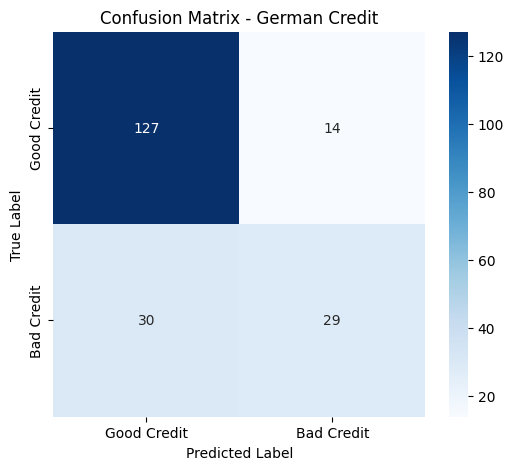

In [53]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Good Credit", "Bad Credit"],
    yticklabels=["Good Credit", "Bad Credit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - German Credit")
plt.show()

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Akurasi Random Forest:", rf.score(X_test, y_test))

Akurasi Random Forest: 0.805


In [55]:

X = df.drop("Target", axis=1)
y = df["Target"]

print("Jumlah fitur:", X.shape[1])
print("Daftar fitur:\n", list(X.columns))


Jumlah fitur: 20
Daftar fitur:
 ['Status Rekening', 'Durasi(bulan)', 'Riwayat Kredit', 'Tujuan Kredit', 'Jumlah Kredit', 'Tabungan', 'Lama Bekerja', 'Rasio Cicilan', 'Status Pribadi', 'Penanggung Lain', 'Lama Tinggal', 'Kepemilikan Properti', 'Usia', 'Rencana Cicilan Lain', 'Tempat Tinggal', 'Jumlah Kredit yang Dimiliki', 'Pekerjaan', 'Jumlah Tanggungan', 'Telepon', 'Pekerja Asing']


In [56]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numeric", StandardScaler(), numeric_cols)
    ]
)

In [57]:
rf = RandomForestClassifier(random_state=42)
print("Daftar Hyperparameter Random Forest:")
print(rf.get_params())


Daftar Hyperparameter Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [58]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.7725000000000001


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


rf_strong = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=8,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)


rf_strong.fit(X_train, y_train)


cv_scores = cross_val_score(rf_strong, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi Cross-Validation Tiap Fold:", cv_scores)
print("Rata-rata Akurasi CV:", round(cv_scores.mean(), 3))


train_acc = rf_strong.score(X_train, y_train)
test_acc = rf_strong.score(X_test, y_test)

print("\nAkurasi Data Train:", round(train_acc, 2))
print("Akurasi Data Test :", round(test_acc, 2))

if train_acc - test_acc > 0.1:
    print("⚠️ Model masih berpotensi overfitting")
else:
    print("✅ Model tidak overfitting dan memiliki generalisasi baik")

Akurasi Cross-Validation Tiap Fold: [0.75    0.70625 0.7125  0.7625  0.74375]
Rata-rata Akurasi CV: 0.735

Akurasi Data Train: 0.84
Akurasi Data Test : 0.76
✅ Model tidak overfitting dan memiliki generalisasi baik


In [60]:
rf_tuned = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)
start = time.time()
rf_tuned.fit(X_train, y_train)
rf_time = time.time() - start
acc_rf  = rf_tuned.score(X_test, y_test)
print("Akurasi Random Forest Tuned (Test):", acc_rf )

print("Best Parameters:")
print(grid_search.best_params_)

# ---------------------------------------------------------
# SIMPAN MODEL
# ---------------------------------------------------------
joblib.dump(rf_tuned, "model_ML_Random_Forest.pkl")
print("Model Random Forest berhasil disimpan")

Akurasi Random Forest Tuned (Test): 0.76
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Model Random Forest berhasil disimpan


Prediksi dan evaluasi

In [61]:
from sklearn.metrics import classification_report

# Model sebelum tuning
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

# Model setelah tuning
y_pred_tuned = rf_tuned.predict(X_test)

print("=== Sebelum Tuning ===")
print(classification_report(y_test, y_pred_default))

print("\n=== Sesudah Tuning ===")
print(classification_report(y_test, y_pred_tuned))


=== Sebelum Tuning ===
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       141
           1       0.75      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200


=== Sesudah Tuning ===
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:\n", cm)

# Analisis label yang sering salah
errors = np.abs(y_test - y_pred_tuned)
error_count = np.sum(errors)
print("Jumlah kesalahan prediksi:", error_count)

wrong_indices = np.where(errors == 1)[0]
print("Contoh indeks data yang salah:", wrong_indices[:10])
error_percentage = (error_count / len(y_test)) * 100
print(f"Persentase Kesalahan Prediksi: {error_percentage:.2f}%")


Confusion Matrix:
 [[128  13]
 [ 35  24]]
Jumlah kesalahan prediksi: 48
Contoh indeks data yang salah: [ 0  1  2 15 18 21 25 26 27 32]
Persentase Kesalahan Prediksi: 24.00%


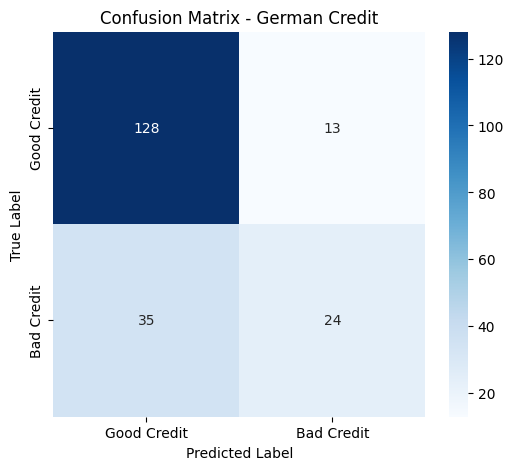

In [63]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Good Credit", "Bad Credit"],
    yticklabels=["Good Credit", "Bad Credit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - German Credit")
plt.show()

In [64]:
# Prediksi label
y_pred_final = rf_tuned.predict(X_test)

# Prediksi probabilitas
y_prob_final = rf_tuned.predict_proba(X_test)[:, 1]

print("10 Prediksi Label Pertama:", y_pred_final[:10])
print("10 Probabilitas Bad Credit Pertama:", y_prob_final[:10])


10 Prediksi Label Pertama: [0 1 1 0 0 0 0 0 0 0]
10 Probabilitas Bad Credit Pertama: [0.40402908 0.54823199 0.67757728 0.28749831 0.06939519 0.35062415
 0.04081883 0.46043461 0.20156413 0.18516617]


In [65]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------------------------
# SCALING
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# ARSITEKTUR MLP
# ---------------------------------------------------------
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# ---------------------------------------------------------
# COMPILATION
# ---------------------------------------------------------
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ---------------------------------------------------------
# EARLY STOPPING
# ---------------------------------------------------------
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# ---------------------------------------------------------
# TRAINING
# ---------------------------------------------------------
start = time.time()
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
mlp_time = time.time() - start

# ---------------------------------------------------------
# EVALUASI
# ---------------------------------------------------------
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

cm_mlp  = confusion_matrix(y_test, y_pred)
acc_mlp  = accuracy_score(y_test, y_pred)
print("Akurasi MLP (Test):", acc_mlp )

print("Confusion Matrix:")
print(cm_mlp)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# SIMPAN MODEL & SCALER
# ---------------------------------------------------------
model.save("model_deep_mlp.keras")
joblib.dump(scaler, "scaler_mlp.pkl")

print("Model MLP dan scaler berhasil disimpan")


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6652 - loss: 0.6719 - val_accuracy: 0.6812 - val_loss: 0.6041
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6652 - loss: 0.6535 - val_accuracy: 0.6938 - val_loss: 0.5872
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6980 - loss: 0.6250 - val_accuracy: 0.6938 - val_loss: 0.5737
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7232 - loss: 0.5842 - val_accuracy: 0.6938 - val_loss: 0.5593
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7110 - loss: 0.6019 - val_accuracy: 0.7063 - val_loss: 0.5487
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6919 - loss: 0.5852 - val_accuracy: 0.7312 - val_loss: 0.5404
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6925 - loss: 0.5718 - val_accuracy: 0.7312 - val_loss: 0.5347
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6969 - loss: 0.5638 - val_accuracy: 0.7437 - val_los

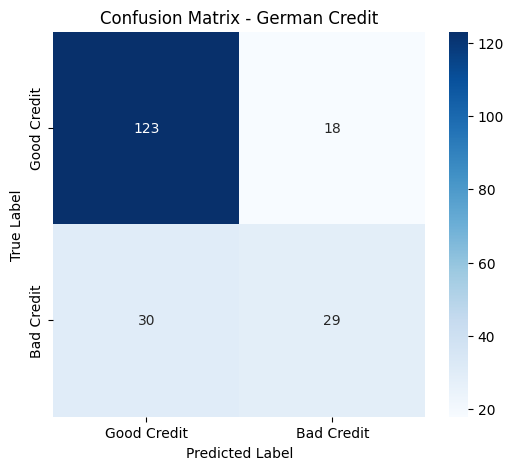

In [66]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Good Credit", "Bad Credit"],
    yticklabels=["Good Credit", "Bad Credit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - German Credit")
plt.show()

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# DATA HASIL MODEL (SESUAI EKSPERIMEN KAMU)
# ---------------------------------------------------------
results = pd.DataFrame({
    'Model': [
        'Logistic Regression (Baseline)',
        'Random Forest (Tuned)',
        'Deep Learning (MLP)'
    ],
    'Accuracy': [
        acc_lr,   # akurasi Logistic Regression
        acc_rf,   # akurasi Random Forest
        acc_mlp   # akurasi MLP
    ],
    'Training Time (sec)': [
        lr_time,
        rf_time,
        mlp_time
    ]
})

# Urutkan berdasarkan akurasi tertinggi
results = results.sort_values(by='Accuracy', ascending=False)

print('--- TABEL PERBANDINGAN MODEL ---')
print(results)


--- TABEL PERBANDINGAN MODEL ---
                            Model  Accuracy  Training Time (sec)
0  Logistic Regression (Baseline)      0.78             3.929658
1           Random Forest (Tuned)      0.76             0.196753
2             Deep Learning (MLP)      0.76             9.116121


C:\Users\USER\AppData\Local\Temp\ipykernel_4668\427470027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Accuracy', palette='magma')


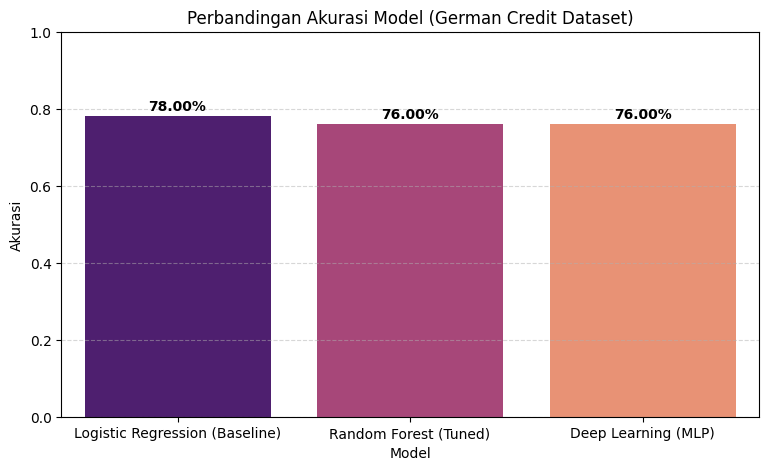

In [68]:
plt.figure(figsize=(9, 5))
sns.barplot(data=results, x='Model', y='Accuracy', palette='magma')

plt.title('Perbandingan Akurasi Model (German Credit Dataset)')
plt.ylim(0, 1.0)
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tampilkan nilai akurasi di atas bar
for i, row in results.iterrows():
    plt.text(
        x=list(results.index).index(i),
        y=row['Accuracy'] + 0.015,
        s=f"{row['Accuracy']*100:.2f}%",
        ha='center',
        fontweight='bold'
    )

plt.show()
